# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K means merupakan metode yang termasuk pada clustering non-hirarki dimana setiap objek yang masuk dalam kelompok (cluster) adalah objek-objek yang sama dan berkorelasi. Data yang tergabung dalam kelompok (cluster) mempunyai tingkat kemiripan yang lebih besar dan memiliki tingkat perbedaan yang besar pula dengan kelompok (cluster) lainnya.

## **Inertia (Sum Square error/SSE)**


Inersia (atau Sum of Squared Errors, SSE) adalah metrik yang digunakan untuk mengevaluasi kinerja algoritma klastering seperti K-Means. Metrik ini mengukur jumlah kuadrat jarak antara setiap titik data dengan centroid klaster yang ditetapkannya.
Inertia didefinisikan sebagai:

$$
\text{SSE(Inertia)} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
Di mana:


- $k$: Jumlah klaster

$C𝑖$ : Klaster 𝑖

$𝑥$ : Titik data

$𝜇𝑖$ : Centroid klaster 𝑖

$∥x−μ i ∥ 2$ : Jarak Euclidean antara titik data dan centroid

## **Silhouette Analysis**


Silhouette Analysis adalah metode evaluasi kualitas klastering yang mengukur seberapa baik suatu objek berada dalam klasternya dan seberapa jauh objek tersebut dari klaster lain. Ini digunakan untuk menentukan jumlah klaster optimal pada algoritma klastering seperti K-Means.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak antara titik data 𝑖 dengan semua titik lain dalam klasternya (intra-cluster distance)
- $b(i)$:  Rata-rata jarak antara titik data 𝑖 dengan semua titik di klaster terdekat lainnya (nearest-cluster distance)
- $s(i)$: Nilai Silhouette untuk data point 𝑖

**Kriteria Penilaian:**

Silhouette Score mendekati 1: Klaster sangat jelas dan terpisah.

Silhouette Score mendekati 0: Klaster tumpang tindih atau tidak jelas.

Silhouette Score mendekati -1: Terjadi kesalahan penempatan klaster.

**Penggunaan:**

Silhouette Analysis biasanya digunakan untuk memilih jumlah klaster optimal.

Skor dapat dihitung untuk berbagai jumlah klaster, kemudian diplot untuk menemukan jumlah klaster yang menghasilkan skor tertinggi.


## Implementasi dengan menggunakan data Iris

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.2 MB/s eta 0:00:00


## Library yang digunakan

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [4]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-138e7d50-postgresqllll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_hUJVkoNFS0qvBDXnrxU",
        database="defaultdb",
        port=10802
    )
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM  "Naufal"."postgree"')
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2386dab1-myysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_bZVPOBZt5yW-M1GcqrS",
        database="defaultdb",
        port=22065
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa           1.4          0.2           4.9          3.0
  3     Iris-setosa          31.0         40.0          31.0         40.0
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa          24.0         70.0          50.0         60.0
  7     Iris-setosa          40.0         30.0          40.0         30.0
  8     Iris-setosa           1.5          5.0           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.6          1.1           4.9          3.1
 11     Iris-setosa           7.0          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Ini adalah data sebelum normalisasi

In [5]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal length  petal width  sepal length  sepal width
          1.4          0.2           5.1          3.5
          1.4          0.2           4.9          3.0
         31.0         40.0          31.0         40.0
          1.5          0.2           4.6          3.1
          1.4          0.2           5.0          3.6
         24.0         70.0          50.0         60.0
         40.0         30.0          40.0         30.0
          1.5          5.0           5.0          3.4
          1.4          0.2           4.4          2.9
          1.6          1.1           4.9          3.1
          7.0          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          6.0          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
         40.0         30.0          60.0         40.0
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

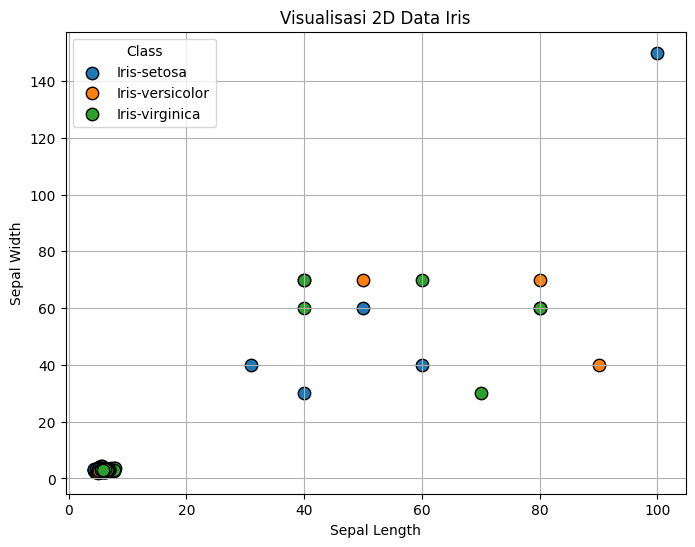

In [7]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

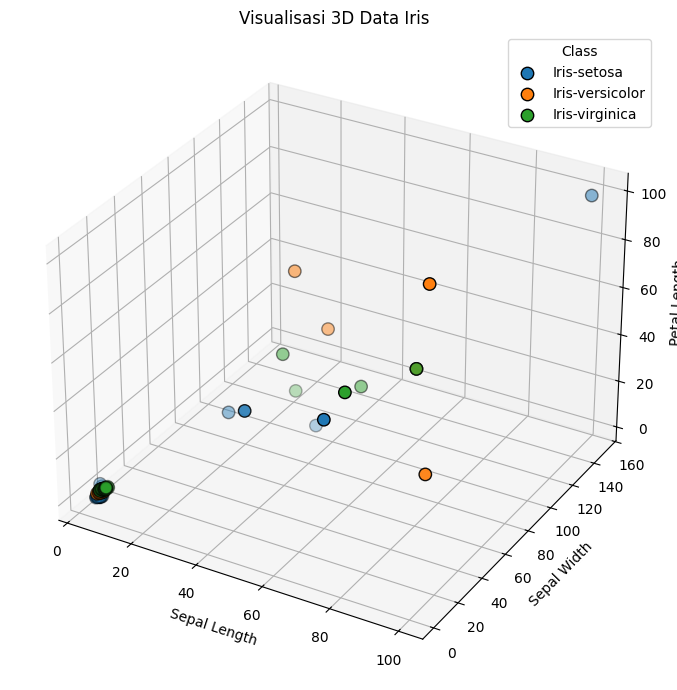

In [8]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

visualisasi data Iris secara 2 Dimensi menggunakan PCA

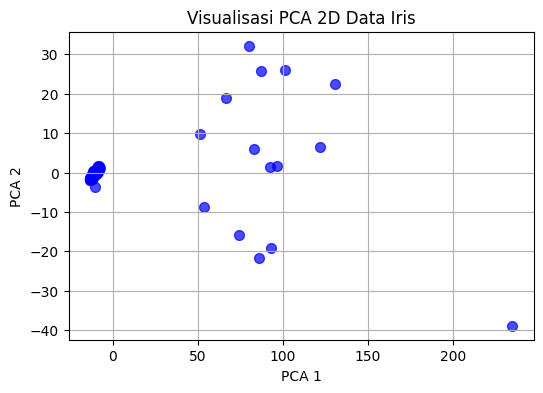

In [9]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi data Iris secara 3 Dimensi menggunakan PCA

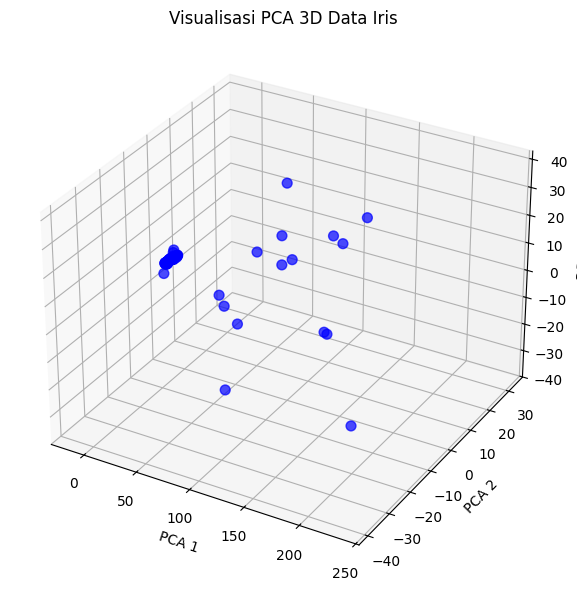

In [10]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

dalam code di bawah ini melakukan normalisasi menggunakan MinMaxScaler untuk menyamakan skala seluruh fitur dalam dataset. ini penting karena fitur di  dalam data saya memiliki nilai yang berbeda, yang dapat memengaruhi algoritma yang bergantung pada perhitungan jarak seperti KNN atau SVM.

In [13]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


data hasil standarisasi menggunakan MinMaxScaler

In [21]:
print (scaled_features);

[[3.03336704e-03 6.67111408e-04 8.35945664e-03 1.01351351e-02]
 [3.03336704e-03 6.67111408e-04 6.26959248e-03 6.75675676e-03]
 [3.02325581e-01 2.66177452e-01 2.78996865e-01 2.56756757e-01]
 [4.04448938e-03 6.67111408e-04 3.13479624e-03 7.43243243e-03]
 [3.03336704e-03 6.67111408e-04 7.31452456e-03 1.08108108e-02]
 [2.31547017e-01 4.66310874e-01 4.77533960e-01 3.91891892e-01]
 [3.93326593e-01 1.99466311e-01 3.73040752e-01 1.89189189e-01]
 [4.04448938e-03 3.26884590e-02 7.31452456e-03 9.45945946e-03]
 [3.03336704e-03 6.67111408e-04 1.04493208e-03 6.08108108e-03]
 [5.05561173e-03 6.67111408e-03 6.26959248e-03 7.43243243e-03]
 [5.96562184e-02 6.67111408e-04 1.14942529e-02 1.14864865e-02]
 [5.05561173e-03 6.67111408e-04 5.22466040e-03 9.45945946e-03]
 [3.03336704e-03 0.00000000e+00 5.22466040e-03 6.75675676e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.75675676e-03]
 [4.95449949e-02 6.67111408e-04 1.56739812e-02 1.35135135e-02]
 [4.04448938e-03 2.00133422e-03 1.46290491e-02 1.621621

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Di sini saya pakai K-Means untuk melakukan clustering dengan 2 cluster. Saya juga hitung Inertia dan Silhouette Score-nya, lalu visualisasikan data Iris dalam 2 dimensi setelah clustering

[2 Clusters] Inertia: 2.6394, Silhouette Score: 0.9187


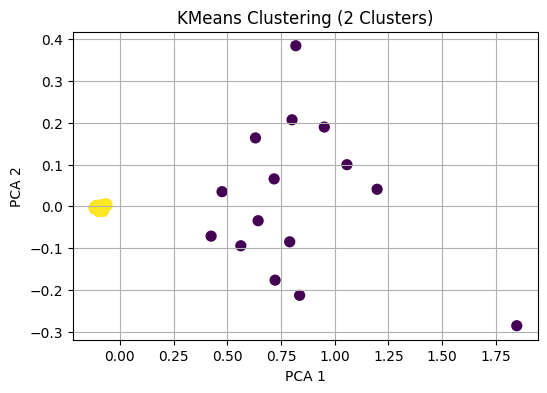

In [15]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 2.6394, Silhouette Score: 0.9187


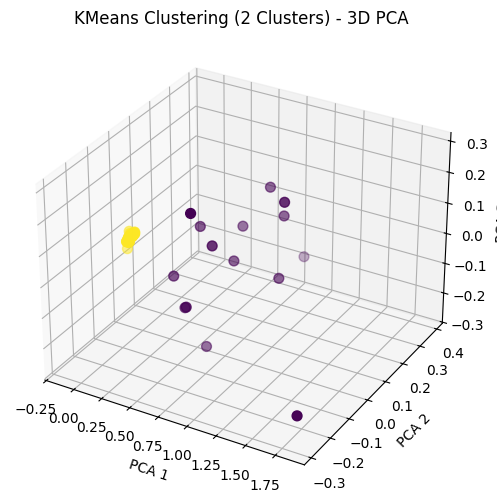

In [16]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

clustering dengan K-Means menggunakan 3 cluster. Saya juga menghitung Inertia dan Silhouette Score, lalu memvisualisasikan data Iris dalam 2 dimensi setelah proses clustering

[3 Clusters] Inertia: 1.3931, Silhouette Score: 0.9181


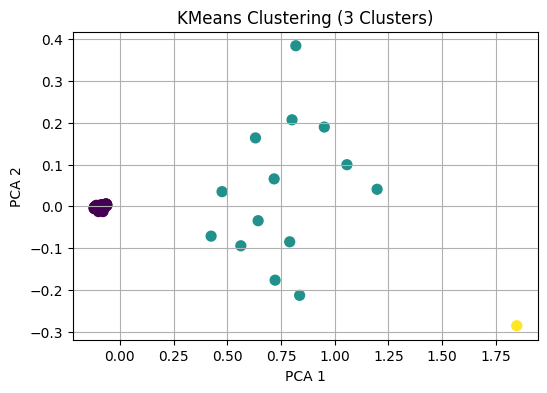

In [17]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 1.3931, Silhouette Score: 0.9181


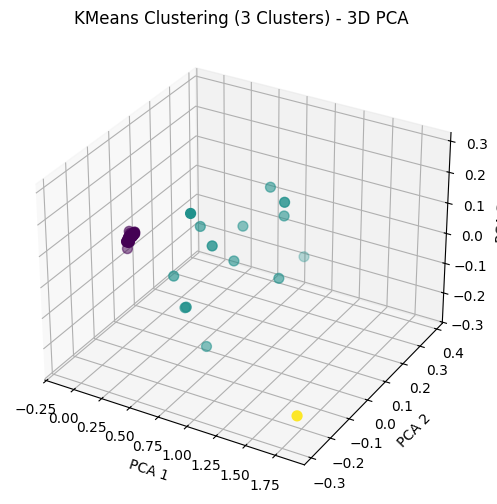

In [18]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

clustering pada data Iris menggunakan K-Means dengan 4 cluster. Setelah itu, saya hitung Inertia dan Silhouette Score, lalu visualisasikan hasil clustering-nya dalam 2 dimensi

[4 Clusters] Inertia: 0.8746, Silhouette Score: 0.8982


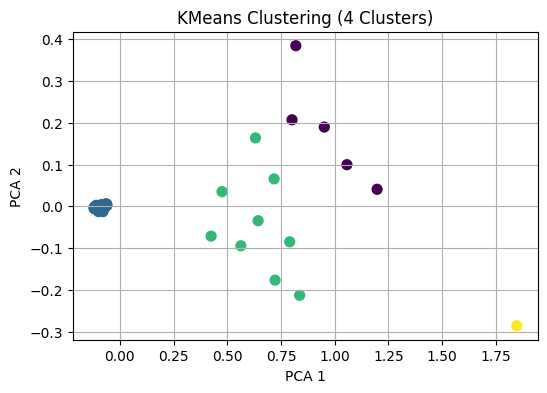

In [19]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 0.8746, Silhouette Score: 0.8982


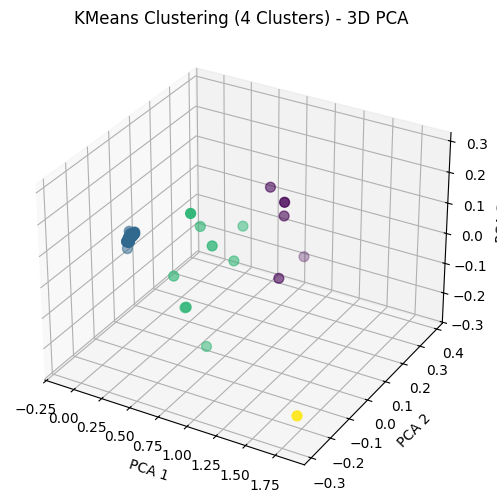

In [20]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
